#Evolução do salário no Brasil.
Avaliando a evolução do Salário mínimo no Brasil de 1996 até 2022 e avaliando a variação em R$ ano a ano, utilizando para tal as bibliotecas Quandl e Pandas.

Instalando a Biblioteca Quandl

In [21]:
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importando as Blibiotecas Quandl e Pandas.
Alterando o nome das bibliotecas para facilirar o uso durante o código

In [22]:
import quandl as qd, pandas as pd

Utilizando a biblioteca Quandl para fazer Download da evolução do salário minimo no Brasil

In [23]:
salario = qd.get('BCB/1619',start_date='1996-01-01')

Exibindo o Data Frame gerado pela Quandl

In [24]:
salario

,Value
Date,
1996-01-31,100.0
1996-02-29,100.0
1996-03-31,100.0
1996-04-30,100.0
1996-05-31,112.0
...,...
2021-11-30,1100.0
2021-12-31,1100.0
2022-01-31,1212.0


Plotando o gráfico gerado ocm a evolução do salário mínimo do Brasil de 1996 até 2022.

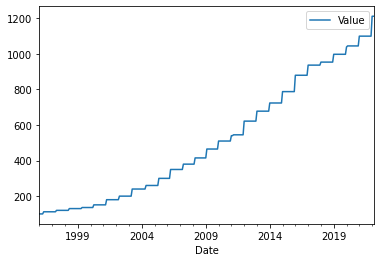

In [25]:
salario.plot();

Criando uma nova variável 'var', para inserir a diferença entre
uma linha de outra do dataframe com base na columa Value.
Inserindo uma nova coluna 'Var' com os resultados da váriavel criada anteriormente.
Por fim exibindo o dataframe com a nova coluna.

In [26]:
var = salario.Value.diff()
salario.insert(loc=1, column='Var',value= var)
salario

,Value,Var
Date,,
1996-01-31,100.0,NaN
1996-02-29,100.0,0.0
1996-03-31,100.0,0.0
1996-04-30,100.0,0.0
1996-05-31,112.0,12.0
...,...,...
2021-11-30,1100.0,0.0
2021-12-31,1100.0,0.0
2022-01-31,1212.0,112.0


Filtrando o data frame para exibir somente os valores da coluna Var que forem maiores que zero.

In [27]:
salario.Var[salario['Var'] > 0]

Date
1996-05-31     12.0
1997-05-31      8.0
1998-05-31     10.0
1999-05-31      6.0
2000-04-30     15.0
2001-04-30     29.0
2002-04-30     20.0
2003-04-30     40.0
2004-05-31     20.0
2005-05-31     40.0
2006-04-30     50.0
2007-04-30     30.0
2008-03-31     35.0
2009-02-28     50.0
2010-01-31     45.0
2011-01-31     30.0
2011-03-31      5.0
2012-01-31     77.0
2013-01-31     56.0
2014-01-31     46.0
2015-01-31     64.0
2016-01-31     92.0
2017-01-31     57.0
2018-01-31     17.0
2019-01-31     44.0
2020-01-31     41.0
2020-02-29      6.0
2021-01-31     55.0
2022-01-31    112.0
Name: Var, dtype: float64

Criando um novo data frame 'ano', com o objetivo de extrair o ano somente da coluna de indice do data frame salario, alterando o nome da coluna de Date para ano e atribuindo como índice para este data frame o mesmo índice do data frame salário.

In [28]:
ano = pd.DataFrame(pd.to_datetime(salario.index).strftime('%Y'))
ano = ano.rename({'Date':'Ano'}, axis = 1)
ano.index = salario.index
ano.head()

,Ano
Date,
1996-01-31,1996
1996-02-29,1996
1996-03-31,1996
1996-04-30,1996
1996-05-31,1996


Concatenando (unindo) os dataframes salário e ano no dataframe salário e exibindo o dataframe atualizado.

In [29]:
salario = pd.concat([salario,ano], axis = 1)
salario.head()

,Value,Var,Ano
Date,,,
1996-01-31,100.0,NaN,1996
1996-02-29,100.0,0.0,1996
1996-03-31,100.0,0.0,1996
1996-04-30,100.0,0.0,1996
1996-05-31,112.0,12.0,1996


Agrupando a soma por ano da variação do salário mínimo com base na coluna Var e exibindo o resultado da variação anual.

In [30]:
var_anual = salario.groupby(['Ano']).sum()
var_anual.Var.head()

Ano
1996    12.0
1997     8.0
1998    10.0
1999     6.0
2000    15.0
Name: Var, dtype: float64

Plotando em um gráfico a variação em R$ ano a ano de 1996 até 2022.

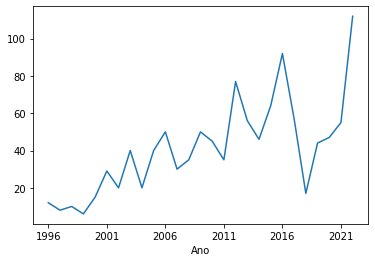

In [31]:
var_anual.Var.plot();

Criando um novo dataframe com a diferença percentual entre os anos.

In [32]:
dif = (salario.Var / (salario.Value - salario.Var)) *100
dif

Date
1996-01-31          NaN
1996-02-29     0.000000
1996-03-31     0.000000
1996-04-30     0.000000
1996-05-31    12.000000
                ...    
2021-11-30     0.000000
2021-12-31     0.000000
2022-01-31    10.181818
2022-02-28     0.000000
2022-03-31     0.000000
Length: 315, dtype: float64

Adicionando ao dataframe salário a diferença percentual criada.

In [33]:
salario.insert(loc=1, column='Perc',value= dif)
salario.head()

,Value,Perc,Var,Ano
Date,,,,
1996-01-31,100.0,NaN,NaN,1996
1996-02-29,100.0,0.0,0.0,1996
1996-03-31,100.0,0.0,0.0,1996
1996-04-30,100.0,0.0,0.0,1996
1996-05-31,112.0,12.0,12.0,1996


Agrupando a diferença por ano, pois estava distribuida em mais de uma linha por ano e inserindo em um novo dataframe.

In [34]:
dif_anual = salario.groupby(['Ano']).sum()
dif_anual['Perc'].head()

Ano
1996    12.000000
1997     7.142857
1998     8.333333
1999     4.615385
2000    11.029412
Name: Perc, dtype: float64

Plotanod o gráfico da diferença perentual, após agrupamento anual.

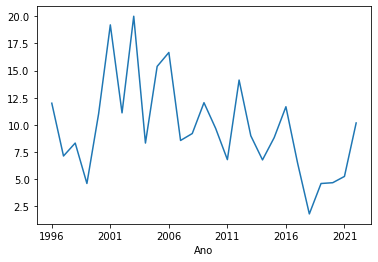

In [35]:
dif_anual['Perc'].plot();

Realisando a união dos dataframes com a diferença em valor e percentual através de Inner Join.

In [36]:
final = pd.merge(var_anual, dif_anual, how = 'inner', on = 'Ano')
final.head()

,Value_x,Var_x,Value_y,Perc,Var_y
Ano,,,,,
1996,1296.0,12.0,1296.0,12.000000,12.0
1997,1408.0,8.0,1408.0,7.142857,8.0
1998,1520.0,10.0,1520.0,8.333333,10.0
1999,1608.0,6.0,1608.0,4.615385,6.0
2000,1767.0,15.0,1767.0,11.029412,15.0


Removendo as colunas que não serão utilizadas para deixar o dataframe somente com as informações desejadas e criando um novo dataframe com essas informações.

In [37]:
final_clean = final.drop(['Value_x','Value_y','Var_y'], axis = 1)
final_clean.head()

,Var_x,Perc
Ano,,
1996,12.0,12.000000
1997,8.0,7.142857
1998,10.0,8.333333
1999,6.0,4.615385
2000,15.0,11.029412


Renomeando as colunas, para que fiquem com as descrições mais relevantes.

In [38]:
final_clean.rename(columns=({'Var_x':'Variação R$','Perc':'Variação %'}),inplace=True)
final_clean.head()

,Variação R$,Variação %
Ano,,
1996,12.0,12.000000
1997,8.0,7.142857
1998,10.0,8.333333
1999,6.0,4.615385
2000,15.0,11.029412


Plotando o gráfico final com as informações de variação em R$ e percentual do salário mínimo de 1996 á 2022.

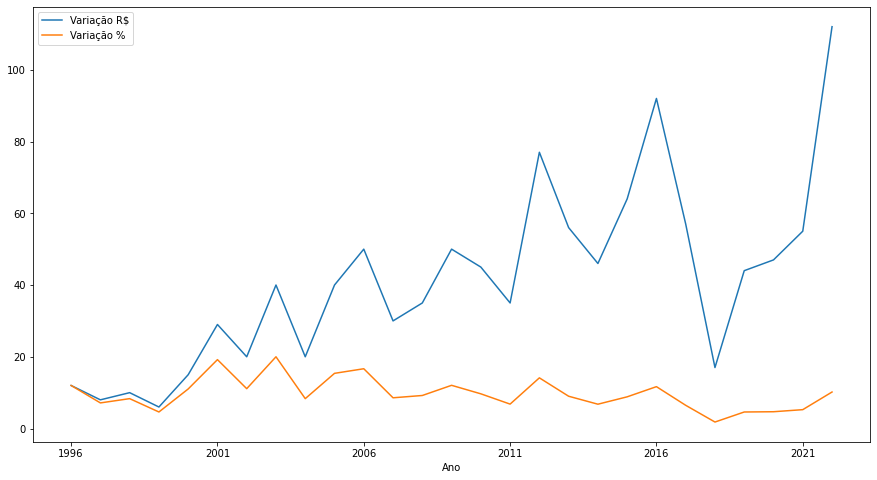

In [39]:
final_clean.plot(figsize=(15,8));